In [104]:
import numpy as np
import scipy.special as sp
import scipy.stats as st
import pandas as pd
import math

In [70]:
n= 10 
μ= 5
σ= 2

In [74]:
#Q1.1 X_BAR抽樣分布
# E(X_BAR)= μ = 5
μ

5

In [80]:
#Q1.2
# E(S^2) = σ^2 = 4
σ**2

4

In [91]:
#Q1.3 
# E(T) = (E(X_BAR)-mu)/(E(S)/sqrt(n)) = 0
0

0

In [93]:
#Q1.4 X_BAR抽樣分布
# Var(X_BAR)=σ^2/n = 4/10
σ**2/n

0.4

In [94]:
#Q1.5
2*σ**4/(n-1)

3.5555555555555554

In [95]:
#Q1.6
(n-1)/(n-3)

1.2857142857142858

In [128]:
#Q1.7
# X_BAR ~ Norm(μ,σ/sqrt(n)) ~ Norm(5,2/sqrt(10))
x=1 #put x here
1/(σ*((2*math.pi)**0.5))*(math.exp(((x-μ)**2)/(-2*σ**2)))

0.02699548325659403

In [131]:
#Q1.8 ??
v=n-1
gamma = sp.gamma
q=1 #put q here
1/(2**(v/2)*gamma(v/2))*(q**(v/2-1))*math.exp(-q/2)

0.002304483090658508

In [130]:
#Q1.9
v=n-1
t=1 #put t here
(1+t**2/v)**(-(1/2)*(1+v))

0.5904899999999998

In [110]:
#Q1.10
st.norm.cdf(x=6,loc=5,scale=2/10**.5)-st.norm.cdf(x=4,loc=5,scale=2/10**.5)

0.8861537019933419

In [111]:
#Q1.11 ??
st.chi2.cdf(5,df=n-1)-st.chi2.cdf(3,df=n-1)

0.12998671249168164

In [112]:
#Q1.12
st.t.cdf(1,df=n-1)-st.t.cdf(-1,df=n-1)

0.6565636038620863

In [113]:
#Q1.13
st.norm.interval(alpha=0.95,loc=μ,scale=σ/n**.5)

(3.760409935390877, 6.239590064609123)

In [114]:
#Q1.14
chi2_int = st.chi2.interval(alpha=0.95,df=n-1)
print((n-1)*(σ**2)/chi2_int[1],(n-1)*(σ**2)/chi2_int[0])

1.8924690865737568 13.331410154076606


In [115]:
#Q1.15
st.t.interval(alpha=0.95,df=n-1)

(-2.2621571627409915, 2.2621571627409915)

count    10000.0
mean       159.8
std          9.9
min        122.6
25%        153.1
50%        159.7
75%        166.5
max        198.0
dtype: float64

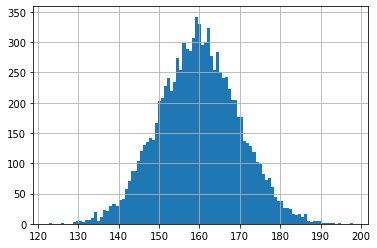

In [116]:
# 針對某大學全體學生做了一次身高普查，學生總數 N= 10000
# 普查資料 存放在 X 

# 先以模擬方式製造一堆 (size= 10000) 符合此種分布的實驗數據

np.random.seed(0)
X= st.norm.rvs(size=10000, loc= 160, scale=10)

# 畫出 分布圖，
# 並觀察母體平均數 mu= E(X)=μ== 159.8, 
# 以及 標準差 sigma= Std(X)=σ== 9.9

X= pd.Series(X)
X.hist(bins= 100, grid=True)
X.describe().round(1)

In [117]:
# 他隨機調查了 n=10 位同學 的身高資料
np.random.seed(0)
smpSize= 10
smpX= X.sample(n= smpSize)
smpX.round(1)
aDF= pd.DataFrame(smpX,columns=['身高(cm)'])
aDF.index.name='學號'
aDF.T.round(1)

學號,9394,898,2398,5906,2343,8225,5506,6451,2670,3497
身高(cm),147.6,185.9,154.0,147.2,168.6,146.8,162.6,164.1,152.2,171.8


In [118]:
E_Xi_1 = smpX.mean()
E_Si_2_1 = smpX.std()

In [119]:
#Q2.16
E_X_BAR_1 = E_Xi_1
E_X_BAR_1

160.08338000005944

In [120]:
#Q2.17 
#VAR_X_BAR = σ^2/n
VAR_X_BAR_1 =  (E_Si_2_1**2/smpSize)**.5
VAR_X_BAR_1

4.080865381756629

In [121]:
#Q2.18
INT_1 = st.norm.interval(alpha=0.95,loc=E_X_BAR_1,scale=VAR_X_BAR_1)
INT_1

(152.08503082606015, 168.08172917405872)

In [122]:
# 這位同學 在另一日額外取得 另 10 位 同學的身高資料
# 他把這批資料併入原始資料，成為一份20人的資料，
# 重新計算所有統計量並獲得信心區間的重新估測。
#
smpSize= 20
np.random.seed(0) #000
smpX= X.sample(n= smpSize)
smpX.round(1)
aDF= pd.DataFrame(smpX,columns=['身高(cm)'])
aDF.index.name='學號'

#aDF.round(1)
#aDF.T.round(1)

# 以下分2列來顯示以利觀看
aDF.iloc[:10].T.round(1)

學號,9394,898,2398,5906,2343,8225,5506,6451,2670,3497
身高(cm),147.6,185.9,154.0,147.2,168.6,146.8,162.6,164.1,152.2,171.8


In [123]:
aDF.iloc[10:].T.round(1)

學號,1087,1819,2308,6084,3724,3184,6387,3728,2702,7883
身高(cm),151.4,152.0,177.1,155.1,159.8,188.0,163.7,178.6,144.0,161.8


In [124]:
E_Xi_2 = smpX.mean()
E_Si_2_2 = smpX.std()
E_X_BAR_2 = E_Xi_2
VAR_X_BAR_2 =  (E_Si_2**2/smpSize)**.5

In [125]:
#Q2.19
INT_2 = st.norm.interval(alpha=0.95,loc=E_X_BAR_2,scale=VAR_X_BAR_2)
INT_2

(155.83555183627425, 167.39689482915537)

In [126]:
#Q2.20
LENGTH_1 = (INT_1[1]-E_X_BAR_1)*2
LENGTH_1

15.996698347998574

In [127]:
LENGTH_2 = (INT_2[1]-E_X_BAR_2)*2
LENGTH_2

11.561342992881123

In [ ]:
# 20人資料 寬度比較小